###  Finding missing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
build_permits = pd.read_csv('Building_Permits.csv')


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
build_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [4]:
build_permits.shape

(198900, 43)

In [5]:
build_permits.isnull().head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False


In [6]:
# finding total missing values

total_missing_count = build_permits.isnull().sum()
total_missing = total_missing_count.sum()
print(total_missing)


2245941


In [7]:
total_cells = np.product(build_permits.shape)
total_cells

8552700

In [8]:
# Percent of data that is missing

percent_missing = (total_missing/total_cells) * 100
print('Percent of data that is missing :',percent_missing)

Percent of data that is missing : 26.26002315058403


In [9]:
build_permits.shape

(198900, 43)

### Drop missing Values

In [10]:
build_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [11]:
build_permits.shape

(198900, 43)

In [12]:
# Remove the column with atleast one missing value

drop_column_wise = build_permits.dropna(axis = 1)
drop_column_wise.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [13]:
drop_column_wise.shape

(198900, 12)

In [14]:
# finding the how much data we lost?

#
original_data = build_permits.shape[1]
#column wise we lose
col_lose = drop_column_wise.shape[1]

#how much data we lose
data_lose = original_data - col_lose
data_lose

31

## Filling in Missing Values Automatically

In [15]:
build_permits.fillna(0).head(2)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0,Ellis,St,...,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,0,Geary,St,...,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718


In [16]:
build_permits.head(2)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718


In [23]:
# replace all NAN's the values that comes directly after/before it in the same column,
#then replace all the remaining NAN's with 0

fill_null = build_permits.fillna(method = 'bfill',axis = 1, inplace = False).fillna(0).head()

In [24]:
fill_null

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,Ellis,St,...,3.0,constr type 3,3.0,3.0,3.0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,Geary,St,...,3.0,constr type 3,3.0,3.0,3.0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,3.0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),3.0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,Market,St,...,3.0,constr type 3,6.0,6.0,6.0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [19]:
check_isnull = fill_null.isnull().sum()
check_isnull[10:30]

Unit                                0
Unit Suffix                         0
Description                         0
Current Status                      0
Current Status Date                 0
Filed Date                          0
Issued Date                         0
Completed Date                      0
First Construction Document Date    0
Structural Notification             0
Number of Existing Stories          0
Number of Proposed Stories          0
Voluntary Soft-Story Retrofit       0
Fire Only Permit                    0
Permit Expiration Date              0
Estimated Cost                      0
Revised Cost                        0
Existing Use                        0
Existing Units                      0
Proposed Use                        0
dtype: int64

In [20]:
# Save the dataset after modifications

#fill_null.to_csv('Building_Permits.csv')

In [74]:

#df = pd.read_csv('Building_Permits.csv')

In [75]:
#df = df.drop('Unnamed: 0',axis = 1)

In [76]:
#df.isnull().sum()[10:30]

In [77]:
#df.describe()

In [28]:
#df.describe().transpose

In [78]:
#df.head()

## Scaling And Normalization

In [30]:
#!pip install stats

In [31]:
#!pip install scipy

In [32]:
import pandas as pd
import numpy as np
#Ploting modules
import seaborn as sns
import matplotlib.pyplot as plt
#for box-cox transformation
from scipy import stats
# for minmax scaling
from mlxtend.preprocessing import minmax_scaling
# set seed for reproducibility
np.random.seed(0)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1.
1) You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

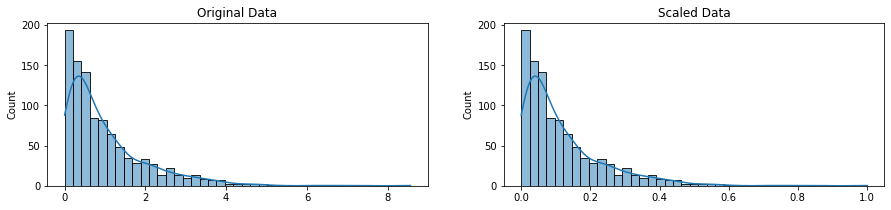

In [33]:
# Generate 1000 data points randomly drawn from an exponential distribution

original_data = np.random.exponential(size = 1000)
#original_data

# Min-max scale the data b/w 0 & 1
scaled_data = minmax_scaling(original_data,columns=[0])
#plot both together to compare

fig, ax = plt.subplots(1,2,figsize = (15,3))
#Original plot
sns.histplot(original_data, ax = ax[0], kde = True, legend= False)
ax[0].set_title("Original Data")
#scaled plot
sns.histplot(scaled_data,ax = ax[1], kde = True, legend= False)
ax[1].set_title("Scaled Data")

plt.show()

## Normalization
 1) Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

2) Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

3) In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

4) The method we're using to normalize here is called the Box-Cox Transformation. 

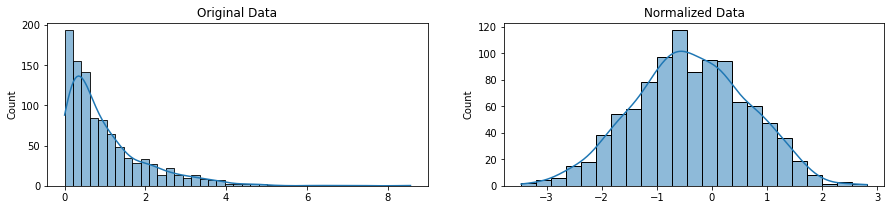

In [34]:
normalized_data = stats.boxcox(original_data)
# plot both together to compare
fig, ax = plt.subplots(1,2,figsize = (15,3))
sns.histplot(original_data,ax = ax[0], kde = True,legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0],ax = ax[1],kde = True,legend=False)
ax[1].set_title("Normalized Data")

plt.show()

In [35]:
kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")

In [36]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [37]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


In [38]:
original_goal_data = pd.DataFrame(kickstarters_2017.goal)
original_goal_data.head(6)

,goal
0,1000.0
1,30000.0
2,45000.0
3,5000.0
4,19500.0
5,50000.0


In [39]:
scaled_goal_data = minmax_scaling(original_goal_data,columns=['goal'])
scaled_goal_data.head(6)

,goal
0,0.000010
1,0.000300
2,0.000450
3,0.000050
4,0.000195
5,0.000500


In [40]:

# #scaled plot
# sns.histplot(scaled_goal_data, kde = True, legend= False)
# plt.title("Scaled Data")

# plt.show()

In [41]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


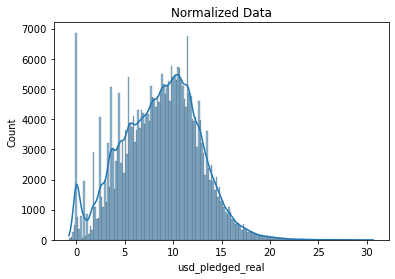

In [73]:
# # get the index of all positive pledges (Box-Cox only takes positive values)
# index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# # get only positive pledges (using their indexes)
# positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# # normalize the pledges (w/ Box-Cox)
# normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
#                                name='usd_pledged_real', index=positive_pledges.index)


sns.histplot(normalized_pledges, kde = True, legend= False)
plt.title("Normalized Data")

plt.show()

## Parsing Dates



In [43]:
earthquakes = pd.read_csv('Earthquake_database.csv')

In [44]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [45]:
earthquakes.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [46]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [47]:
earthquakes['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object

1) You may have to check the numpy documentation to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

In [48]:
earthquakes['Date'].dtype

dtype('O')

### Convert our date columns to datetime
1) Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

2) We can determine what the format of our dates are with a guide called "strftime directive", which you can find more information on at this link. The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

3) Some examples:
   - 1/17/07 has the format "%m/%d/%y"
   - 17-1-2007 has the format "%d-%m-%Y"

4) Looking back up at the head of the "date" column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates:

In [49]:
date_length = earthquakes.Date.str.len()
date_length.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [50]:
indices = np.where([date_length == 24])[1]
print('Indices with currepted data : ',indices)
earthquakes.loc[indices]

Indices with currepted data :  [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [51]:
earthquakes.loc[3378,'Date'] = '02/23/1975'
earthquakes.loc[7512,'Date'] = '04/28/1985'
earthquakes.loc[20650,'Date'] = '03/13/2011'

earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'],format='%m/%d/%Y')

 1) What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you can have pandas try to infer what the right date format should be. You can do that like so:
landslides['date_parsed']=pd.to_datetime(landslides['Date'],infer_datetime_format=True)

* 
2) Why don't you always use 'infer_datetime_format = True?' There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

In [52]:
earthquakes.date_parsed.head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed, dtype: datetime64[ns]

In [53]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09


### Select the day of the month
1) Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

In [54]:
day_of_month = earthquakes['date_parsed'].dt.day
day_of_month.head()

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int64

### Plot the day of the month to check the date parsing
1) One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

2) To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

/tmp/ipykernel_5179/3349062656.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month,kde = False,bins = 31)


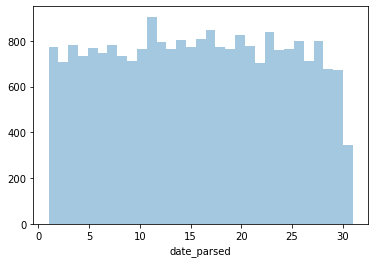

In [55]:
# remove na's
day_of_month = day_of_month.dropna()
#plot
sns.distplot(day_of_month,kde = False,bins = 31)
plt.show()

## Inconsistent data Entry

In [56]:
#!pip install fuzzywuzzy

In [57]:
#!pip install charset_normalizer

In [58]:
import pandas as pd
import numpy as np
#Helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

/home/mahesh/.local/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [59]:
professors = pd.read_csv('pakistan_intellectual_capital.csv')

In [60]:
np.random.seed(0)

In [61]:
professors = professors.drop('Unnamed: 0',axis = 1)

### Do some preliminary text pre-processing

In [62]:
professors.head()

,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [63]:
countries = professors['Country'].unique()

In [64]:
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

1) Just looking at this, I can see some problems due to inconsistent data entry: ' Germany', and 'germany', for example, or ' New Zealand' and 'New Zealand'.

2) The first thing I'm going to do is make everything lower case (I can change it back at the end if I like) and remove any white spaces at the beginning and end of cells. Inconsistencies in capitalizations and trailing white spaces are very common in text data and you can fix a good 80% of your text data entry inconsistencies by doing this.

In [65]:
professors['Country'] = professors['Country'].str.lower()
professors['Country'] = professors['Country'].str.strip()


In [66]:
countries = professors['Country'].unique()
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

### Use fuzzy matching to correct inconsistent data entry
Alright, let's take another look at the 'Country' column and see if there's any more data cleaning we need to do.

It does look like there is another inconsistency: 'southkorea' and 'south korea' should be the same.

We're going to use the fuzzywuzzy package to help identify which strings are closest to each other. This dataset is small enough that we could probably could correct errors by hand, but that approach doesn't scale well. (Would you want to correct a thousand errors by hand? What about ten thousand? Automating things as early as possible is generally a good idea. Plus, it’s fun!)

##### Fuzzy matching: 
3) The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. So "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" and one change away (rplace "i" with "o"). You won't always be able to rely on fuzzy matching 100%, but it will usually end up saving you at least a little time.

Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings. Here, we're going to get the ten strings from our list of cities that have the closest distance to "south korea".

In [67]:
matches = fuzzywuzzy.process.extract('south korea',countries,limit = 10,
                                     scorer=fuzzywuzzy.fuzz.token_sort_ratio)

In [68]:
matches
#matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

We can see that two of the items in the cities are very close to "south korea": "south korea" and "southkorea". Let's replace all rows in our "Country" column that have a ratio of > 47 with "south korea".

To do this, I'm going to write a function. (It's a good idea to write a general purpose function you can reuse if you think you might have to do a specific task more than once or twice. This keeps you from having to copy and paste code too often, which saves time and can help prevent mistakes.)

In [69]:
def replace_matches_in_column(df,column,string_to_match,min_ratio = 47):
    #get a list of unique strings
    string = df[column].unique()
    #get the top 10 closest matches to our input string
    
    matches = fuzzywuzzy.process.extract(string_to_match,string,limit = 10,
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    # only get matches with ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    
    #get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)
    
    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches,column] = string_to_match
    print("Done all")
    

In [70]:
replace_matches_in_column(df = professors,column='Country',string_to_match='south korea')

Done all


1) And now let's check the unique values in our "Country" column again and make sure we've tidied up "south korea" correctly.

In [71]:
countries = professors['Country'].unique()

In [72]:
countries

array(['thailand', 'pakistan', 'germany', 'austria', 'australia', 'uk',
       'china', 'france', 'usofa', 'south korea', 'malaysia', 'sweden',
       'italy', 'canada', 'norway', 'ireland', 'new zealand', 'urbana',
       'portugal', 'russian federation', 'usa', 'finland', 'netherland',
       'greece', 'turkey', 'macau', 'singapore', 'spain', 'japan',
       'hongkong', 'saudi arabia', 'mauritius', 'scotland'], dtype=object)

#                      THANKYOU KAGGLE